# SIMPLE LINEAR 2 
Build a simple linear regression model by performing EDA and do necessary 
transformations and select the best model using R or Python.

Delivery_time -> Predict delivery time using sorting time 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns
from scipy.stats import probplot
from scipy.stats import boxcox
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# loading the data
df=pd.read_csv('delivery_time.csv')
df


,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
## EDA
list(df)

['Delivery Time', 'Sorting Time']

In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
df.shape

(21, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [7]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


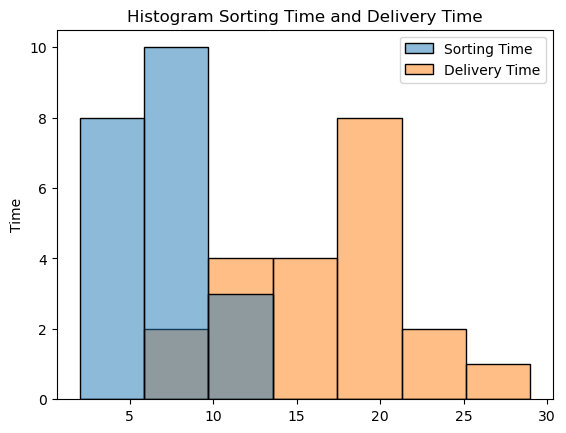

In [8]:
# histogram
sns.histplot(data=df[['Sorting Time', 'Delivery Time']])
plt.title('Histogram Sorting Time and Delivery Time')
plt.ylabel('Time')
plt.show()


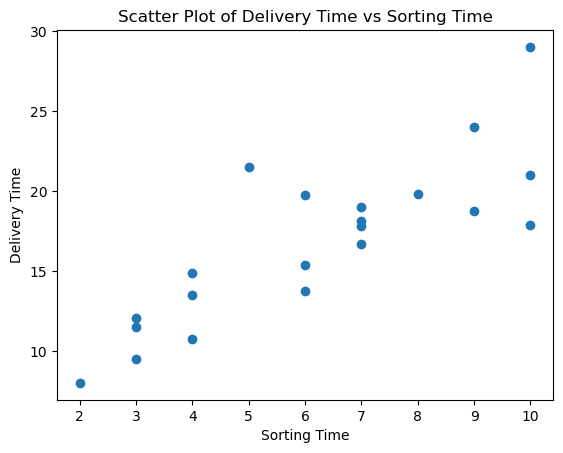

In [9]:
# scatter plot
plt.scatter(df['Sorting Time'], df['Delivery Time'])
plt.title('Scatter Plot of Delivery Time vs Sorting Time')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()


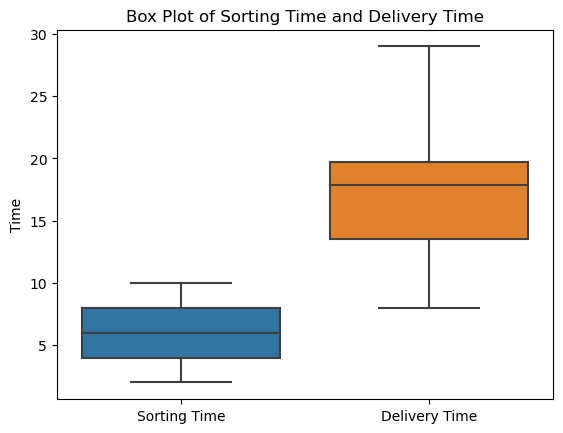

In [10]:
##-----box plot----## 
sns.boxplot(data=df[['Sorting Time', 'Delivery Time']])
plt.title('Box Plot of Sorting Time and Delivery Time')
plt.ylabel('Time')
plt.show()


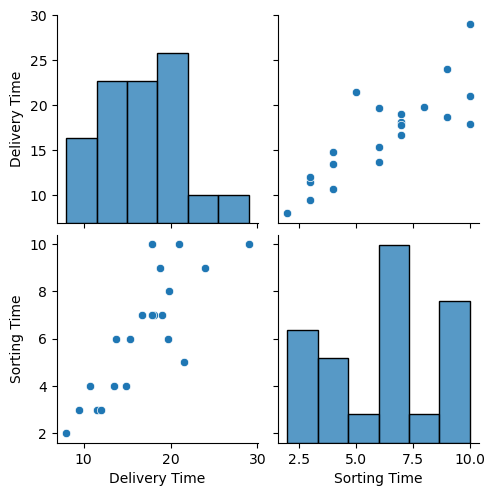

In [11]:
#-- pair plot--##
sns.pairplot(df)
plt.show()


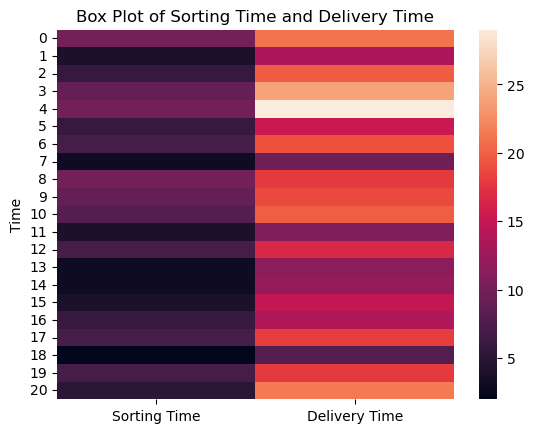

In [12]:
#-- heat map--##
sns.heatmap(data=df[['Sorting Time', 'Delivery Time']])
plt.title('Box Plot of Sorting Time and Delivery Time')
plt.ylabel('Time')
plt.show()


C:\Users\Durga Prasad\AppData\Local\Temp\ipykernel_13936\1677449020.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

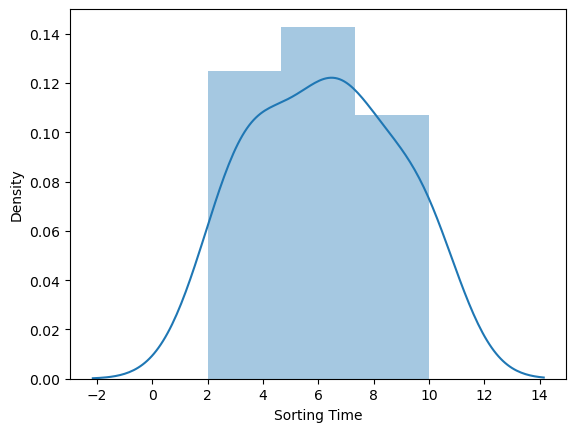

In [13]:
#---Distribution plot---##
sns.distplot(df['Sorting Time'])


C:\Users\Durga Prasad\AppData\Local\Temp\ipykernel_13936\115999355.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

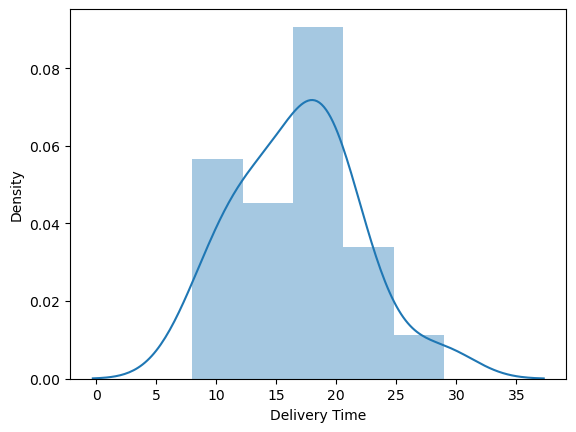

In [14]:
#---Distribution plot---##
sns.distplot(df['Delivery Time'])


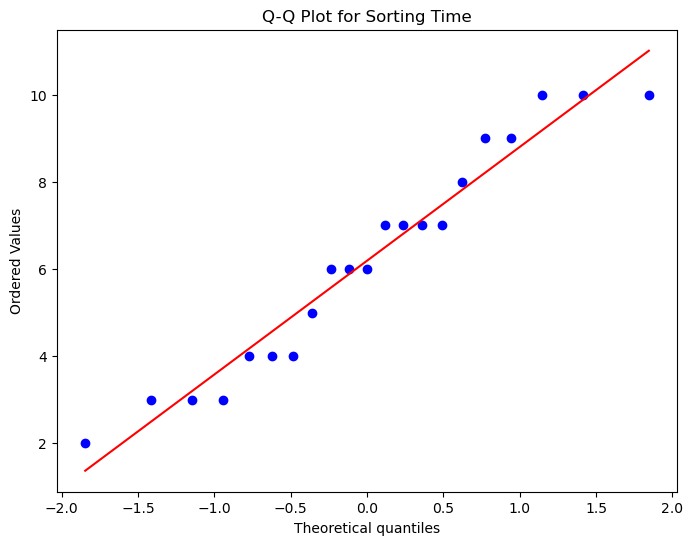

In [15]:
# Q-Q Plot for Sorting Time
plt.figure(figsize=(8, 6))
probplot(df['Sorting Time'], dist='norm', plot=plt)
plt.title('Q-Q Plot for Sorting Time')
plt.show()


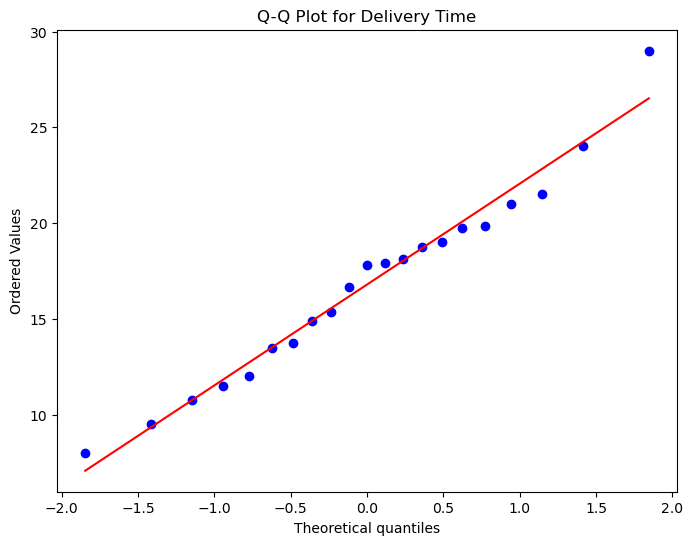

In [16]:
# Q-Q Plot for Delivery Time
plt.figure(figsize=(8, 6))
probplot(df['Delivery Time'], dist='norm', plot=plt)
plt.title('Q-Q Plot for Delivery Time')
plt.show()


In [17]:
# X and Y variables
# X and Y 
x = df[['Sorting Time']]
y = df['Delivery Time']


In [18]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42) 


In [19]:
# Initialize the Linear Regression model
Lr= LinearRegression()
Lr.fit(x_train, y_train)


LinearRegression()

In [20]:
# Predict on the test set
y_pred_train=Lr.predict(x_train)
y_pred_test = Lr.predict(x_test)


In [21]:
# printing train,test,rmse erros:
print('Average train error(Root mean squared) :',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('Average test error(Root mean squared) :',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print('R^2 score:',r2_score(y_train,y_pred_train))


Average train error(Root mean squared) : 2.7770666832487807
Average test error(Root mean squared) : 3.351678551561038
R^2 score: 0.7539121518197861


In [22]:
def evaluate_model(x, y, model):
    y_pred = model.predict(x)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, r2


In [23]:
# Log Transformation
log_model = LinearRegression()
log_y_train = np.log(y_train)
log_y_test = np.log(y_test)
log_model.fit(x_train, log_y_train)
log_mse, log_r2 = evaluate_model(x_test, np.log(y_test), log_model)
print("Log Transformation MSE: {:.4f}, R-squared: {:.4f}".format(log_mse, log_r2))


Log Transformation MSE: 0.0395, R-squared: 0.0518


In [24]:
# Square Root Transformation
sqrt_model = LinearRegression()
sqrt_y_train = np.sqrt(y_train)
sqrt_y_test = np.sqrt(y_test)
sqrt_model.fit(x_train, sqrt_y_train)
sqrt_mse, sqrt_r2 = evaluate_model(x_test, np.sqrt(y_test), sqrt_model)
print("Square Root Transformation MSE: {:.4f}, R-squared: {:.4f}".format(sqrt_mse, sqrt_r2))


Square Root Transformation MSE: 0.1603, R-squared: -0.0150


In [25]:
# Box-Cox Transformation
boxcox_model = LinearRegression()
boxcox_y_train, maxlog = boxcox(y_train)
boxcox_model = LinearRegression()
boxcox_model.fit(x_train, boxcox_y_train)
boxcox_mse, boxcox_r2 = evaluate_model(x_test, boxcox(y_test, lmbda=maxlog), boxcox_model)
print("Box-Cox Transformation MSE: {:.4f}, R-squared: {:.4f}".format(boxcox_mse, boxcox_r2))


Box-Cox Transformation MSE: 1.5051, R-squared: -0.0476


In [26]:
#polynomial Transformation
degree = 2  # You can adjust the degree as needed
poly = PolynomialFeatures(degree=degree)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)
poly_model = LinearRegression()
poly_model.fit(x_poly_train, y_train)
poly_mse, poly_r2 = evaluate_model(x_poly_test, y_test, poly_model)
print("Polynomial Transformation (Degree {}) MSE: {:.4f}, R-squared: {:.4f}".format(degree, poly_mse, poly_r2))


Polynomial Transformation (Degree 2) MSE: 11.9841, R-squared: -0.2244


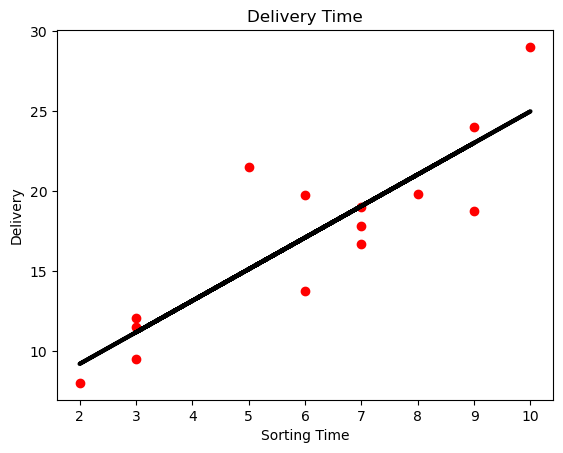

In [22]:
#---Visualize the regression line--##
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, y_pred_train, color='black', linewidth=3)
plt.title('Delivery Time')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery')
plt.show()
